# Data Visualiazation and Statistical Analysis

In [90]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [29]:
sns.set()

In [80]:
df = pd.read_excel('Hotels.xlsx')

In [3]:
df.head()

,Hotel Name,Location,Number of Rooms,Number of Employees,Average Room Rate,Occupancy Rate,Revenue
0,Beachside Inn,Florida,150,75,150,85,1275000
1,Canyon Resort,Arizona,300,150,200,70,4200000
2,Canyon Springs Resort,Arizona,400,200,220,70,6160000
3,Cityscape Hotel,Illinois,300,150,200,85,4500000
4,Coastal Retreat,Georgia,250,125,180,75,4500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Hotel Name           32 non-null     object
 1   Location             32 non-null     object
 2   Number of Rooms      32 non-null     int64 
 3   Number of Employees  32 non-null     int64 
 4   Average Room Rate    32 non-null     int64 
 5   Occupancy Rate       32 non-null     int64 
 6   Revenue              32 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 1.9+ KB


In [71]:
df.shape

(32, 7)

In [72]:
df.isnull().sum()

Hotel Name             0
Location               0
Number of Rooms        0
Number of Employees    0
Average Room Rate      0
Occupancy Rate         0
Revenue                0
dtype: int64

In [10]:
df.dtypes

Hotel Name             object
Location               object
Number of Rooms         int64
Number of Employees     int64
Average Room Rate       int64
Occupancy Rate          int64
Revenue                 int64
dtype: object

In [11]:
df_temp = df.drop(['Hotel Name', 'Location'], axis = 1)

In [13]:
df_temp.head()

,Number of Rooms,Number of Employees,Average Room Rate,Occupancy Rate,Revenue
0,150,75,150,85,1275000
1,300,150,200,70,4200000
2,400,200,220,70,6160000
3,300,150,200,85,4500000
4,250,125,180,75,4500000


In [16]:
#correlation
corr = df_temp.corr()
corr

,Number of Rooms,Number of Employees,Average Room Rate,Occupancy Rate,Revenue
Number of Rooms,1.000000,0.880995,0.625994,-0.055648,0.865802
Number of Employees,0.880995,1.000000,0.562121,-0.122287,0.810721
Average Room Rate,0.625994,0.562121,1.000000,0.202516,0.850175
Occupancy Rate,-0.055648,-0.122287,0.202516,1.000000,0.097759
Revenue,0.865802,0.810721,0.850175,0.097759,1.000000


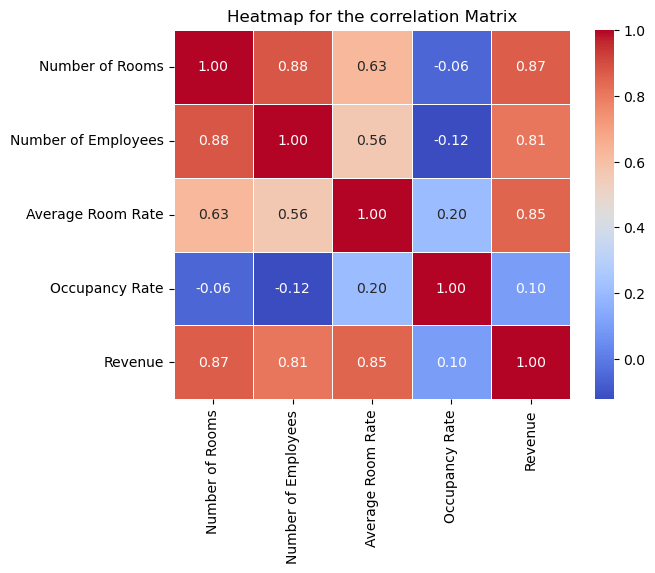

In [24]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap for the correlation Matrix')
plt.show()

### Crosstab

In [27]:
pd.crosstab(df['Location'], df['Occupancy Rate'])

Occupancy Rate,70,75,80,85,90
Location,,,,,
Arizona,3,0,0,0,0
California,0,1,3,0,0
Florida,0,0,0,3,0
Georgia,0,2,0,0,0
Hawaii,1,0,0,1,2
Illinois,0,3,1,1,0
Massachusetts,0,1,2,0,0
Nevada,1,1,0,0,1
New York,0,1,0,0,0


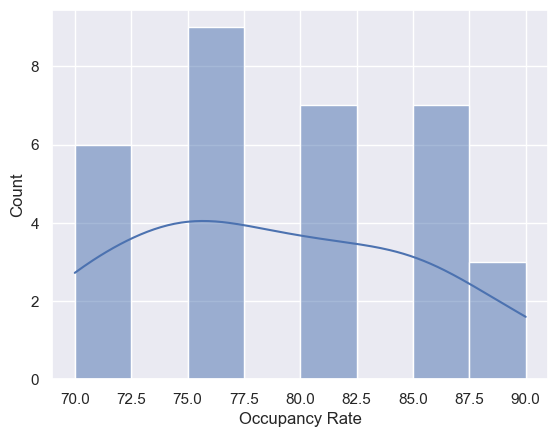

In [42]:
sns.histplot(df['Occupancy Rate'], bins = 8, kde = True)
plt.show()

In [37]:
pd.crosstab(df['Location'], df['Occupancy Rate'], values = df['Average Room Rate'], aggfunc = 'mean')

Occupancy Rate,70,75,80,85,90
Location,,,,,
Arizona,223.333333,NaN,NaN,NaN,NaN
California,NaN,180.000000,190.0,NaN,NaN
Florida,NaN,NaN,NaN,233.333333,NaN
Georgia,NaN,190.000000,NaN,NaN,NaN
Hawaii,300.000000,NaN,NaN,300.000000,300.0
Illinois,NaN,186.666667,250.0,200.000000,NaN
Massachusetts,NaN,220.000000,200.0,NaN,NaN
Nevada,250.000000,250.000000,NaN,NaN,250.0
New York,NaN,200.000000,NaN,NaN,NaN


In [45]:
df2 = df.groupby('Location')['Number of Rooms'].sum().sort_values(ascending = False)
df2

Location
Hawaii           1550
Illinois         1250
Arizona          1100
Nevada           1100
California        950
Florida           800
Texas             650
New York          500
Georgia           450
Massachusetts     300
Name: Number of Rooms, dtype: int64

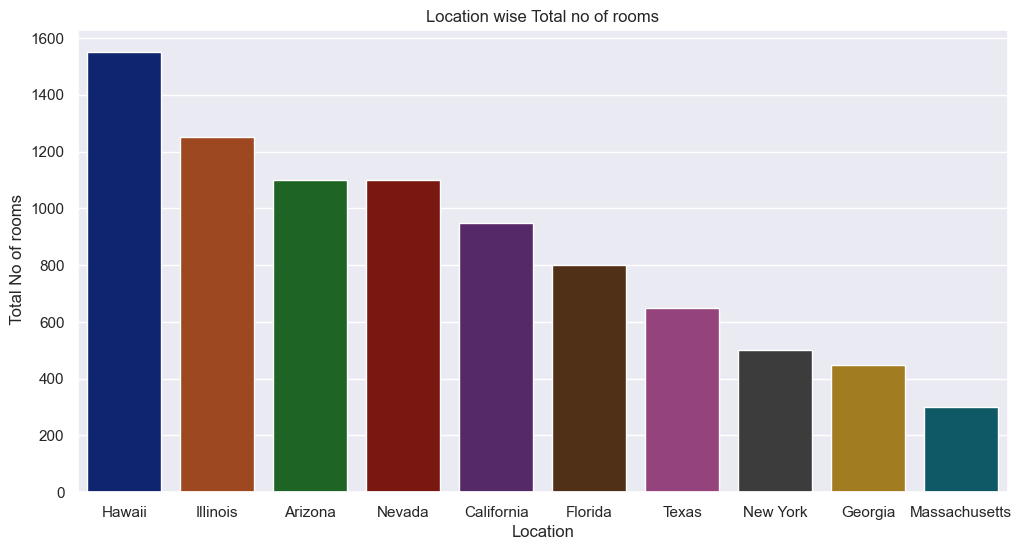

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(x = df2.index, y = df2.values , palette = 'dark')
plt.xlabel('Location')
plt.ylabel(' Total No of rooms')
plt.title('Location wise Total no of rooms')
plt.show()

In [53]:
df3 = df.groupby('Location')['Number of Employees'].sum().sort_values(ascending = False)
df3

Location
Hawaii           825
Illinois         800
Arizona          550
Nevada           550
California       450
Florida          450
Texas            400
New York         250
Georgia          225
Massachusetts    150
Name: Number of Employees, dtype: int64

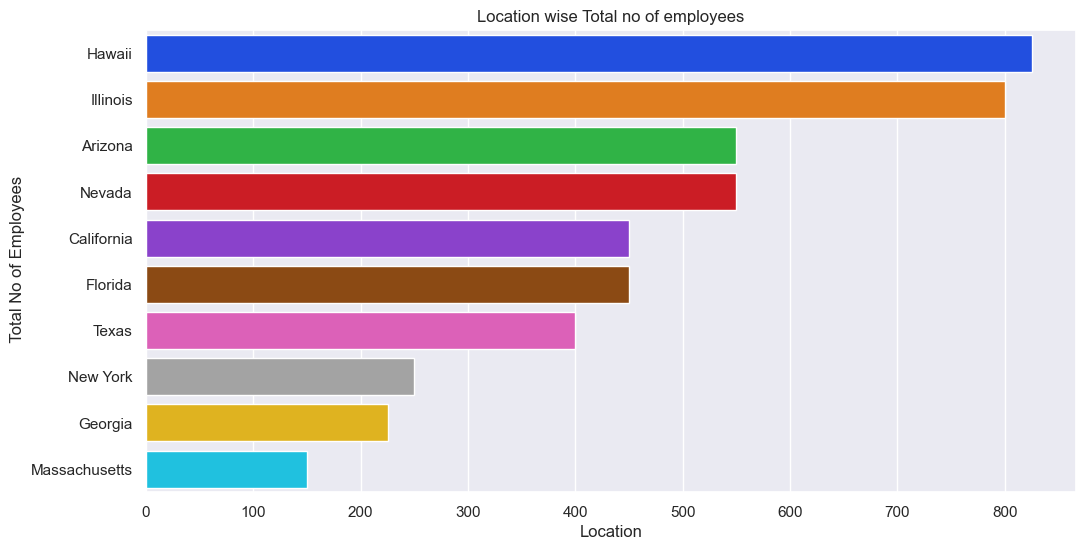

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(x = df3.values, y = df3.index , palette = 'bright')
plt.xlabel('Location')
plt.ylabel(' Total No of Employees')
plt.title('Location wise Total no of employees')
plt.show()

In [59]:
df4 = df.groupby('Location')['Revenue'].sum().sort_values(ascending =True)
df4

Location
Massachusetts     5580000
Georgia           7500000
New York          8000000
Texas             8280000
California       13420000
Arizona          15960000
Florida          17700000
Illinois         20475000
Nevada           26350000
Hawaii           42450000
Name: Revenue, dtype: int64

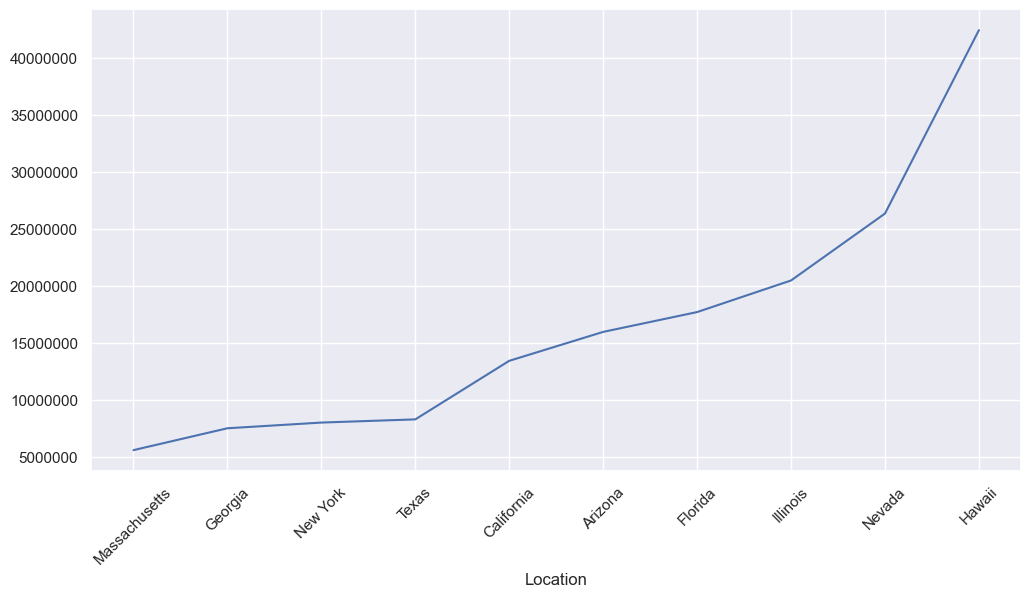

In [65]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(x = df4.index, y = df4.values )
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 45)
plt.show()

## Dummy Coding

In [81]:
df['Location'].unique()

array(['Florida', 'Arizona', 'Illinois', 'Georgia', 'Massachusetts',
       'Nevada', 'New York', 'Texas', 'Hawaii', 'California'],
      dtype=object)

In [82]:
df_dummies = pd.get_dummies(df, columns = ['Location'])

In [83]:
df_dummies

,Hotel Name,Number of Rooms,Number of Employees,Average Room Rate,Occupancy Rate,Revenue,Location_Arizona,Location_California,Location_Florida,Location_Georgia,Location_Hawaii,Location_Illinois,Location_Massachusetts,Location_Nevada,Location_New York,Location_Texas
0,Beachside Inn,150,75,150,85,1275000,False,False,True,False,False,False,False,False,False,False
1,Canyon Resort,300,150,200,70,4200000,True,False,False,False,False,False,False,False,False,False
2,Canyon Springs Resort,400,200,220,70,6160000,True,False,False,False,False,False,False,False,False,False
3,Cityscape Hotel,300,150,200,85,4500000,False,False,False,False,False,True,False,False,False,False
4,Coastal Retreat,250,125,180,75,4500000,False,False,False,True,False,False,False,False,False,False
5,Cozy Corner Inn,100,50,150,80,1350000,False,False,False,False,False,False,True,False,False,False
6,Desert Mirage Resort,400,200,250,90,8500000,False,False,False,False,False,False,False,True,False,False
7,Desert Oasis Resort,350,175,250,75,8925000,False,False,False,False,False,False,False,True,False,False
8,Grand Plaza Hotel,500,250,200,75,8000000,False,False,False,False,False,False,False,False,True,False
9,Harbor Bay Hotel,100,50,220,75,1980000,False,False,False,False,False,False,True,False,False,False


In [79]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Hotel Name              32 non-null     object
 1   Number of Rooms         32 non-null     int64 
 2   Number of Employees     32 non-null     int64 
 3   Average Room Rate       32 non-null     int64 
 4   Occupancy Rate          32 non-null     int64 
 5   Revenue                 32 non-null     int64 
 6   Location_Arizona        32 non-null     bool  
 7   Location_California     32 non-null     bool  
 8   Location_Florida        32 non-null     bool  
 9   Location_Georgia        32 non-null     bool  
 10  Location_Hawaii         32 non-null     bool  
 11  Location_Illinois       32 non-null     bool  
 12  Location_Massachusetts  32 non-null     bool  
 13  Location_Nevada         32 non-null     bool  
 14  Location_New York       32 non-null     bool  
 15  Location

In [84]:
stats.zscore(df['Revenue'])

0    -1.217384
1    -0.305186
2     0.306064
3    -0.211628
4    -0.211628
5    -1.193994
6     1.035821
7     1.168363
8     0.879890
9    -0.997521
10   -0.716845
11   -0.913318
12    2.127339
13   -1.390467
14   -1.053656
15   -1.390467
16    0.256166
17    0.100234
18    0.131421
19    1.168363
20    1.565987
21   -0.679421
22    1.168363
23   -1.053656
24    1.753104
25    0.069048
26    0.723959
27   -0.716845
28    1.332090
29   -0.562473
30   -0.679421
31   -0.492304
Name: Revenue, dtype: float64

### Standardization of Data

In [92]:
scaler = MinMaxScaler()

In [93]:
df5 = df[['Revenue']]

In [94]:
scaler.fit_transform(df5)

array([[0.04920213],
       [0.30851064],
       [0.4822695 ],
       [0.33510638],
       [0.33510638],
       [0.05585106],
       [0.68971631],
       [0.72739362],
       [0.64539007],
       [0.11170213],
       [0.19148936],
       [0.1356383 ],
       [1.        ],
       [0.        ],
       [0.09574468],
       [0.        ],
       [0.46808511],
       [0.42375887],
       [0.43262411],
       [0.72739362],
       [0.84042553],
       [0.20212766],
       [0.72739362],
       [0.09574468],
       [0.89361702],
       [0.41489362],
       [0.60106383],
       [0.19148936],
       [0.77393617],
       [0.23537234],
       [0.20212766],
       [0.25531915]])